In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib import style
import matplotlib.cm as cm

In [12]:
kc_df = pd.DataFrame()

In [14]:
kc_df = pd.read_csv('https://raw.githubusercontent.com/brijshah27/King-Countyt-Datra/master/kc_house_data.csv')

In [15]:
print(kc_df.shape)

(21613, 21)


In [16]:
list(kc_df.columns.values)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [17]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built']
#features = list(kc_df.columns.values)

In [18]:
feature_matrix = kc_df[features]
lable_vector = kc_df['price']
feature_matrix.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


In [19]:
X_train, X_test, y_train, y_test = train_test_split(feature_matrix, lable_vector, test_size=0.3, random_state=3)

In [20]:
# Initialize classifiers 
#my_logreg = LogisticRegression()

my_linear = LinearRegression()

#my_decisiontree = DecisionTreeClassifier()

#k = 5
#knn = KNeighborsClassifier(n_neighbors=k)

In [21]:
#knn.fit(X_train, y_train)

#my_decisiontree.fit(X_train, y_train)

#my_logreg.fit(X_train, y_train)

my_linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
# printing Theta0 using attribute "intercept_":
print(my_linear.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_linear.coef_)
coef_list = my_linear.coef_
# coef_list.sort()
print(coef_list)

6461472.20531
[ -3.63453263e+04   4.59850421e+04   1.12835313e+02  -2.27124562e-01
   2.81322640e+04   5.29438621e+05   4.93081587e+04   1.81986059e+04
   1.23643988e+05   5.61046684e+01   5.67306448e+01  -3.70924829e+03]
[ -3.63453263e+04   4.59850421e+04   1.12835313e+02  -2.27124562e-01
   2.81322640e+04   5.29438621e+05   4.93081587e+04   1.81986059e+04
   1.23643988e+05   5.61046684e+01   5.67306448e+01  -3.70924829e+03]


In [24]:
feature_dict = dict(zip(features, coef_list))
print(feature_dict)
import operator
sorted_d = sorted(feature_dict.items(), key=operator.itemgetter(1),reverse=True)
print('Dictionary in descending order by value : ',sorted_d)

{'bedrooms': -36345.326302930967, 'bathrooms': 45985.042077590108, 'sqft_living': 112.83531323383281, 'sqft_lot': -0.22712456233651324, 'floors': 28132.263967059673, 'waterfront': 529438.62057369074, 'view': 49308.158704706584, 'condition': 18198.605870255516, 'grade': 123643.98836587249, 'sqft_above': 56.104668441810645, 'sqft_basement': 56.730644823430339, 'yr_built': -3709.2482901308686}
Dictionary in descending order by value :  [('waterfront', 529438.62057369074), ('grade', 123643.98836587249), ('view', 49308.158704706584), ('bathrooms', 45985.042077590108), ('floors', 28132.263967059673), ('condition', 18198.605870255516), ('sqft_living', 112.83531323383281), ('sqft_basement', 56.730644823430339), ('sqft_above', 56.104668441810645), ('sqft_lot', -0.22712456233651324), ('yr_built', -3709.2482901308686), ('bedrooms', -36345.326302930967)]


In [25]:
#sorted_features = ['waterfront', 'grade', 'view', 'bathrooms', 'floors', 'condition']
sorted_features = ['sqft_living','sqft_basement','sqft_above','sqft_lot','yr_built','bedrooms']
best_feature_matrix = kc_df[sorted_features]
best_feature_matrix = preprocessing.scale(best_feature_matrix)
#best_feature_matrix.head()

X_train, X_test, y_train, y_test = train_test_split(best_feature_matrix, lable_vector, test_size=0.3, random_state=3)
my_linear.fit(X_train, y_train)
y_predict_ln = my_linear.predict(X_test)
print(y_predict_ln)

[  373998.66022209  1315694.66022209   815982.66022209 ...,
   183406.66022209   521838.66022209   281710.66022209]


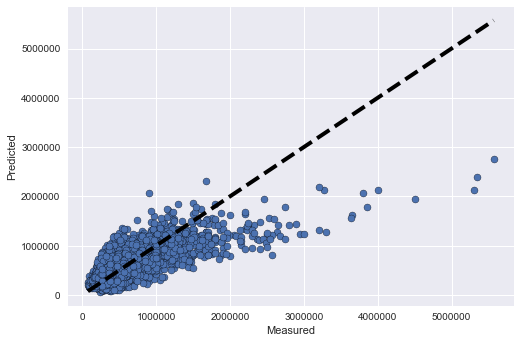

[  373998.66022209  1315694.66022209   815982.66022209 ...,
   183406.66022209   521838.66022209   281710.66022209]


In [26]:
#predict testing data

#y_predict_knn = knn.predict(X_test)

#y_predict_dt = my_decisiontree.predict(X_test)

#y_predict_lr = my_logreg.predict(X_test)
y_predict_ln = my_linear.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict_ln, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

print(y_predict_ln)
#print(y_predict_lr)
#print(y_predict_dt)
#print(y_predict_knn)

In [27]:
# from sklearn.metrics import accuracy_score

# score_lr = accuracy_score(y_test, y_predict_lr.argmax(axis=1))
# #score_dt = accuracy_score(y_test, y_predict_dt)
# #score_knn = accuracy_score(y_test, y_predict_knn)
# print("Logistic Regression:>>> ",score_lr)
# #print("Decision Tree>> ",score_dt)
# #print("KNN>>>> ",score_knn)

In [28]:
error = mean_squared_error(y_test, y_predict_ln)
print(error)

61420632854.2


In [29]:
root_mean_square_error = np.sqrt(error)
print(root_mean_square_error)

247831.864082


In [30]:
kv_linear_reg = LinearRegression()
new_feature_marrix = preprocessing.scale(feature_matrix)
kv_mse = cross_val_score(kv_linear_reg,new_feature_marrix,lable_vector, cv=10, scoring='neg_mean_squared_error')

#print(credit_mse)

credit_mse_positive = -kv_mse

credit_rmse = np.sqrt(credit_mse_positive)

#print(credit_rmse)

print(credit_rmse.mean())

217280.951089


In [31]:
# for feature in feature_matrix:
#     plt.plot(kc_df[feature], kc_df['price'])
#     red_patch = mpatches.Patch(color='red', label= feature)
#     plt.legend(handles=[red_patch])
#     plt.show()

In [32]:
my_RandomForest = RandomForestClassifier(n_estimators = 10, bootstrap = True, random_state=2)
my_RandomForest.fit(X_train,y_train) #train random forest classifier using training data
y_predict_rf=my_RandomForest.predict(X_test) #predict using testing data
score_rf=accuracy_score(y_test, y_predict_rf) #accuracy based on predicted values and original values
print("Random Forest> ",score_rf)

Random Forest>  0.00493522516965


In [34]:
kc_df['year_sell'] = [int(i[:4]) for i in kc_df.date]

kc_df.year_sell.value_counts().sort_index()


test=kc_df[kc_df.year_sell==2015].reset_index(drop=True )
train=kc_df[kc_df.year_sell==2014].reset_index(drop=True )
x=train[kc_df.columns.drop(['price','id','date'])]
y=train['price']
col=kc_df.columns.drop(['price','id','date'])
clf = LinearRegression()
clf.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

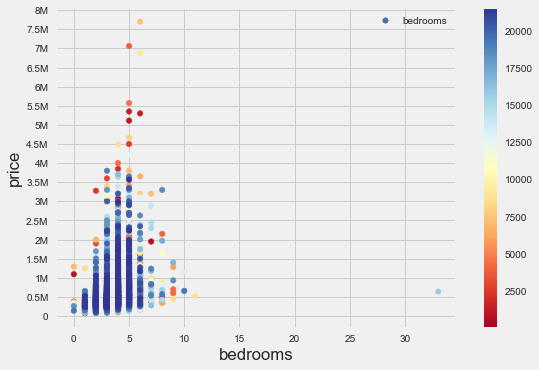

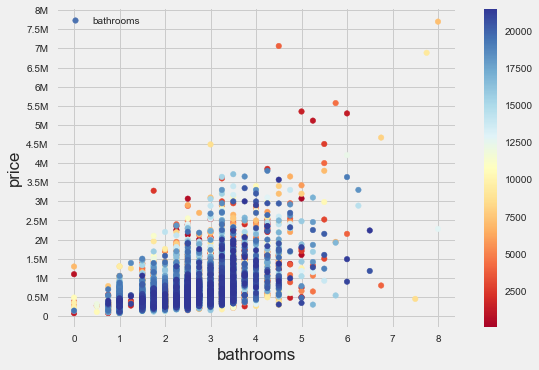

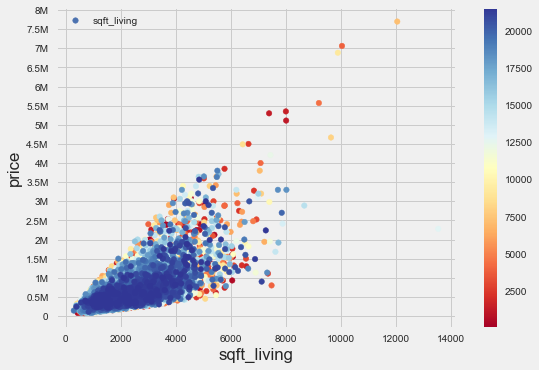

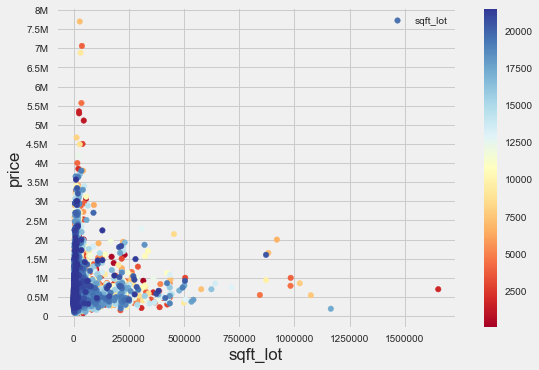

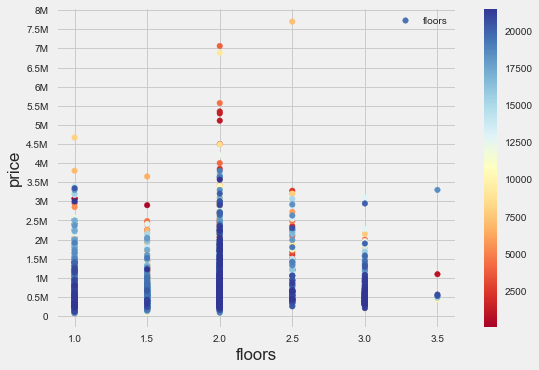

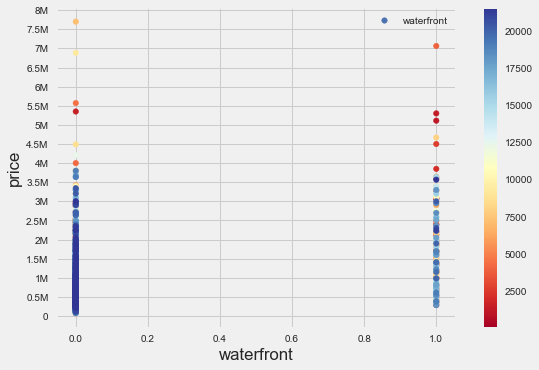

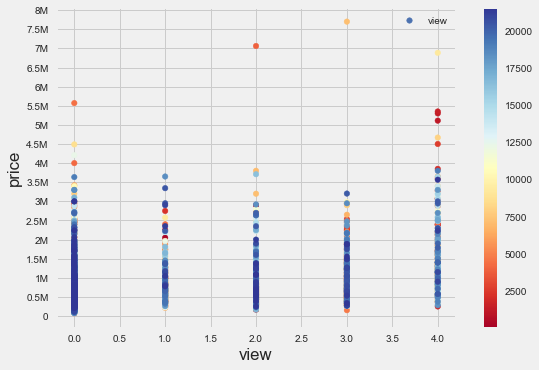

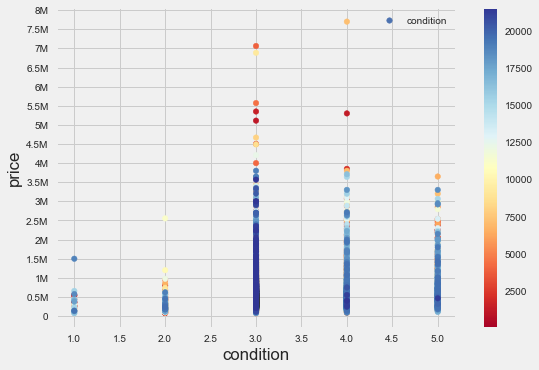

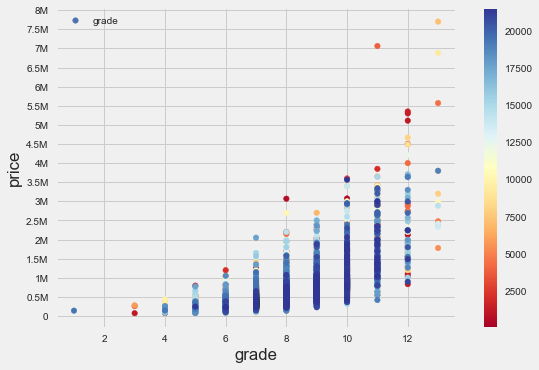

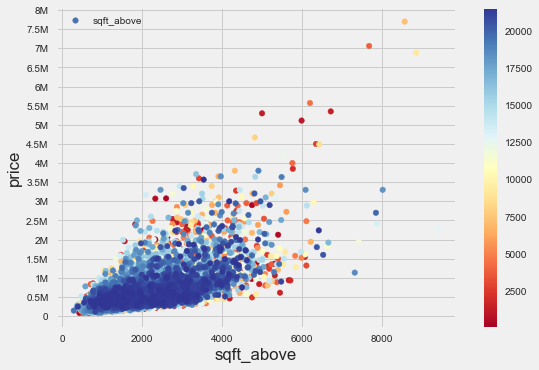

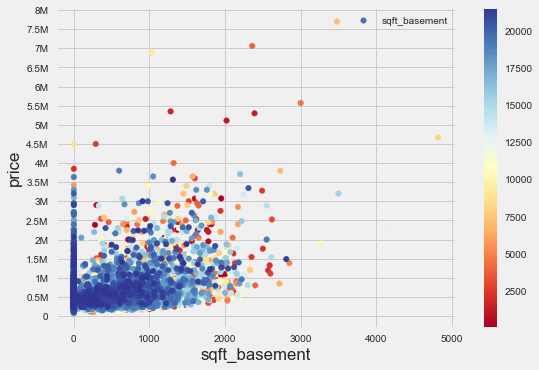

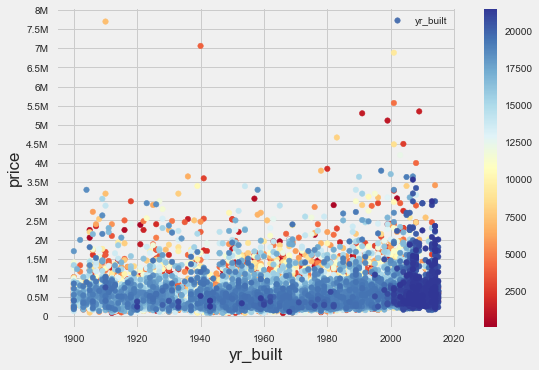

In [35]:
style.use('fivethirtyeight')
cm = plt.cm.get_cmap('RdYlBu')
xy = range(1,21614)
z = xy
for feature in feature_matrix:
    sc = plt.scatter(kc_df[feature], kc_df['price'], label = feature, c = z, marker = 'o', s = 30, cmap = cm)
    plt.colorbar(sc)
    plt.xlabel(''+feature)
    plt.ylabel('price')
    plt.yticks([0, 500000, 1000000, 1500000, 2000000, 2500000, 3000000, 3500000, 4000000, 4500000, 5000000, 5500000, 6000000, 6500000, 7000000, 7500000, 8000000],
            ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M',  '3.5M', '4M', '4.5M', '5M', '5.5M', '6M', '6.5M', '7M', '7.5M', '8M',])
    plt.legend()
    plt.show()

In [37]:
clf.score(x,y)

0.70720633808996691

In [38]:
# plt.matshow(kc_df.corr()) 
# plt.xticks(range(len(kc_df.columns)), kc_df.columns) 
# plt.yticks(range(len(kc_df.columns)), kc_df.columns) 
# plt.colorbar() 
# plt.show()

# # selecting a couple columns
couple_columns = kc_df[['price','bedrooms', 'bathrooms']]
#couple_columns.head()

phase_1_2 = couple_columns.groupby(['bedrooms', 'bathrooms']).mean()
print (phase_1_2.shape)
phase_1_2.head(10)

phase_1_2 = phase_1_2.reset_index()
phase_1_2.head(20)

(144, 1)


,bedrooms,bathrooms,price
0,0,0.00,520371.428571
1,0,0.75,265000.000000
2,0,1.00,228000.000000
3,0,1.50,288000.000000
4,0,2.50,299983.333333
5,1,0.00,279666.666667
6,1,0.50,255000.000000
7,1,0.75,251053.703704
8,1,1.00,316629.956522
9,1,1.25,881750.000000


In [39]:
import seaborn as sns; 
phase_1_2.pivot('bedrooms', 'bathrooms','price').head()

bathrooms,0.0,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,...,5.25,5.5,5.75,6.0,6.25,6.5,6.75,7.5,7.75,8.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
0,520371.428571,NaN,265000.000000,228000.000000,NaN,288000.000000,NaN,NaN,NaN,299983.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,279666.666667,255000.0,251053.703704,316629.956522,881750.000000,325745.833333,366050.000000,297166.666667,436225.000000,489500.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,191000.0,327513.500000,348072.801027,468983.333333,410121.438776,471248.667763,448356.226852,517654.779661,540896.842640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,311512.562500,336184.648876,605125.000000,398189.268999,435506.234225,447470.544847,485457.331793,517432.391175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,312500.0,331250.000000,391165.301538,NaN,442373.874016,490005.653686,475166.535238,585905.911142,581818.308553,...,1623000.0,2355000.0,1940000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


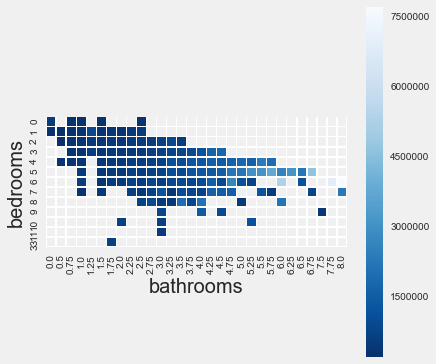

In [40]:
plt.figure(figsize=(6,6))
pivot_table = phase_1_2.pivot('bedrooms', 'bathrooms','price')
plt.xlabel('bathrooms', size = 20)
plt.ylabel('bedrooms', size = 20)
#plt.title('Energy from Helix Phase Angles', size = 20)
sns.heatmap(pivot_table, fmt=".1f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.show()

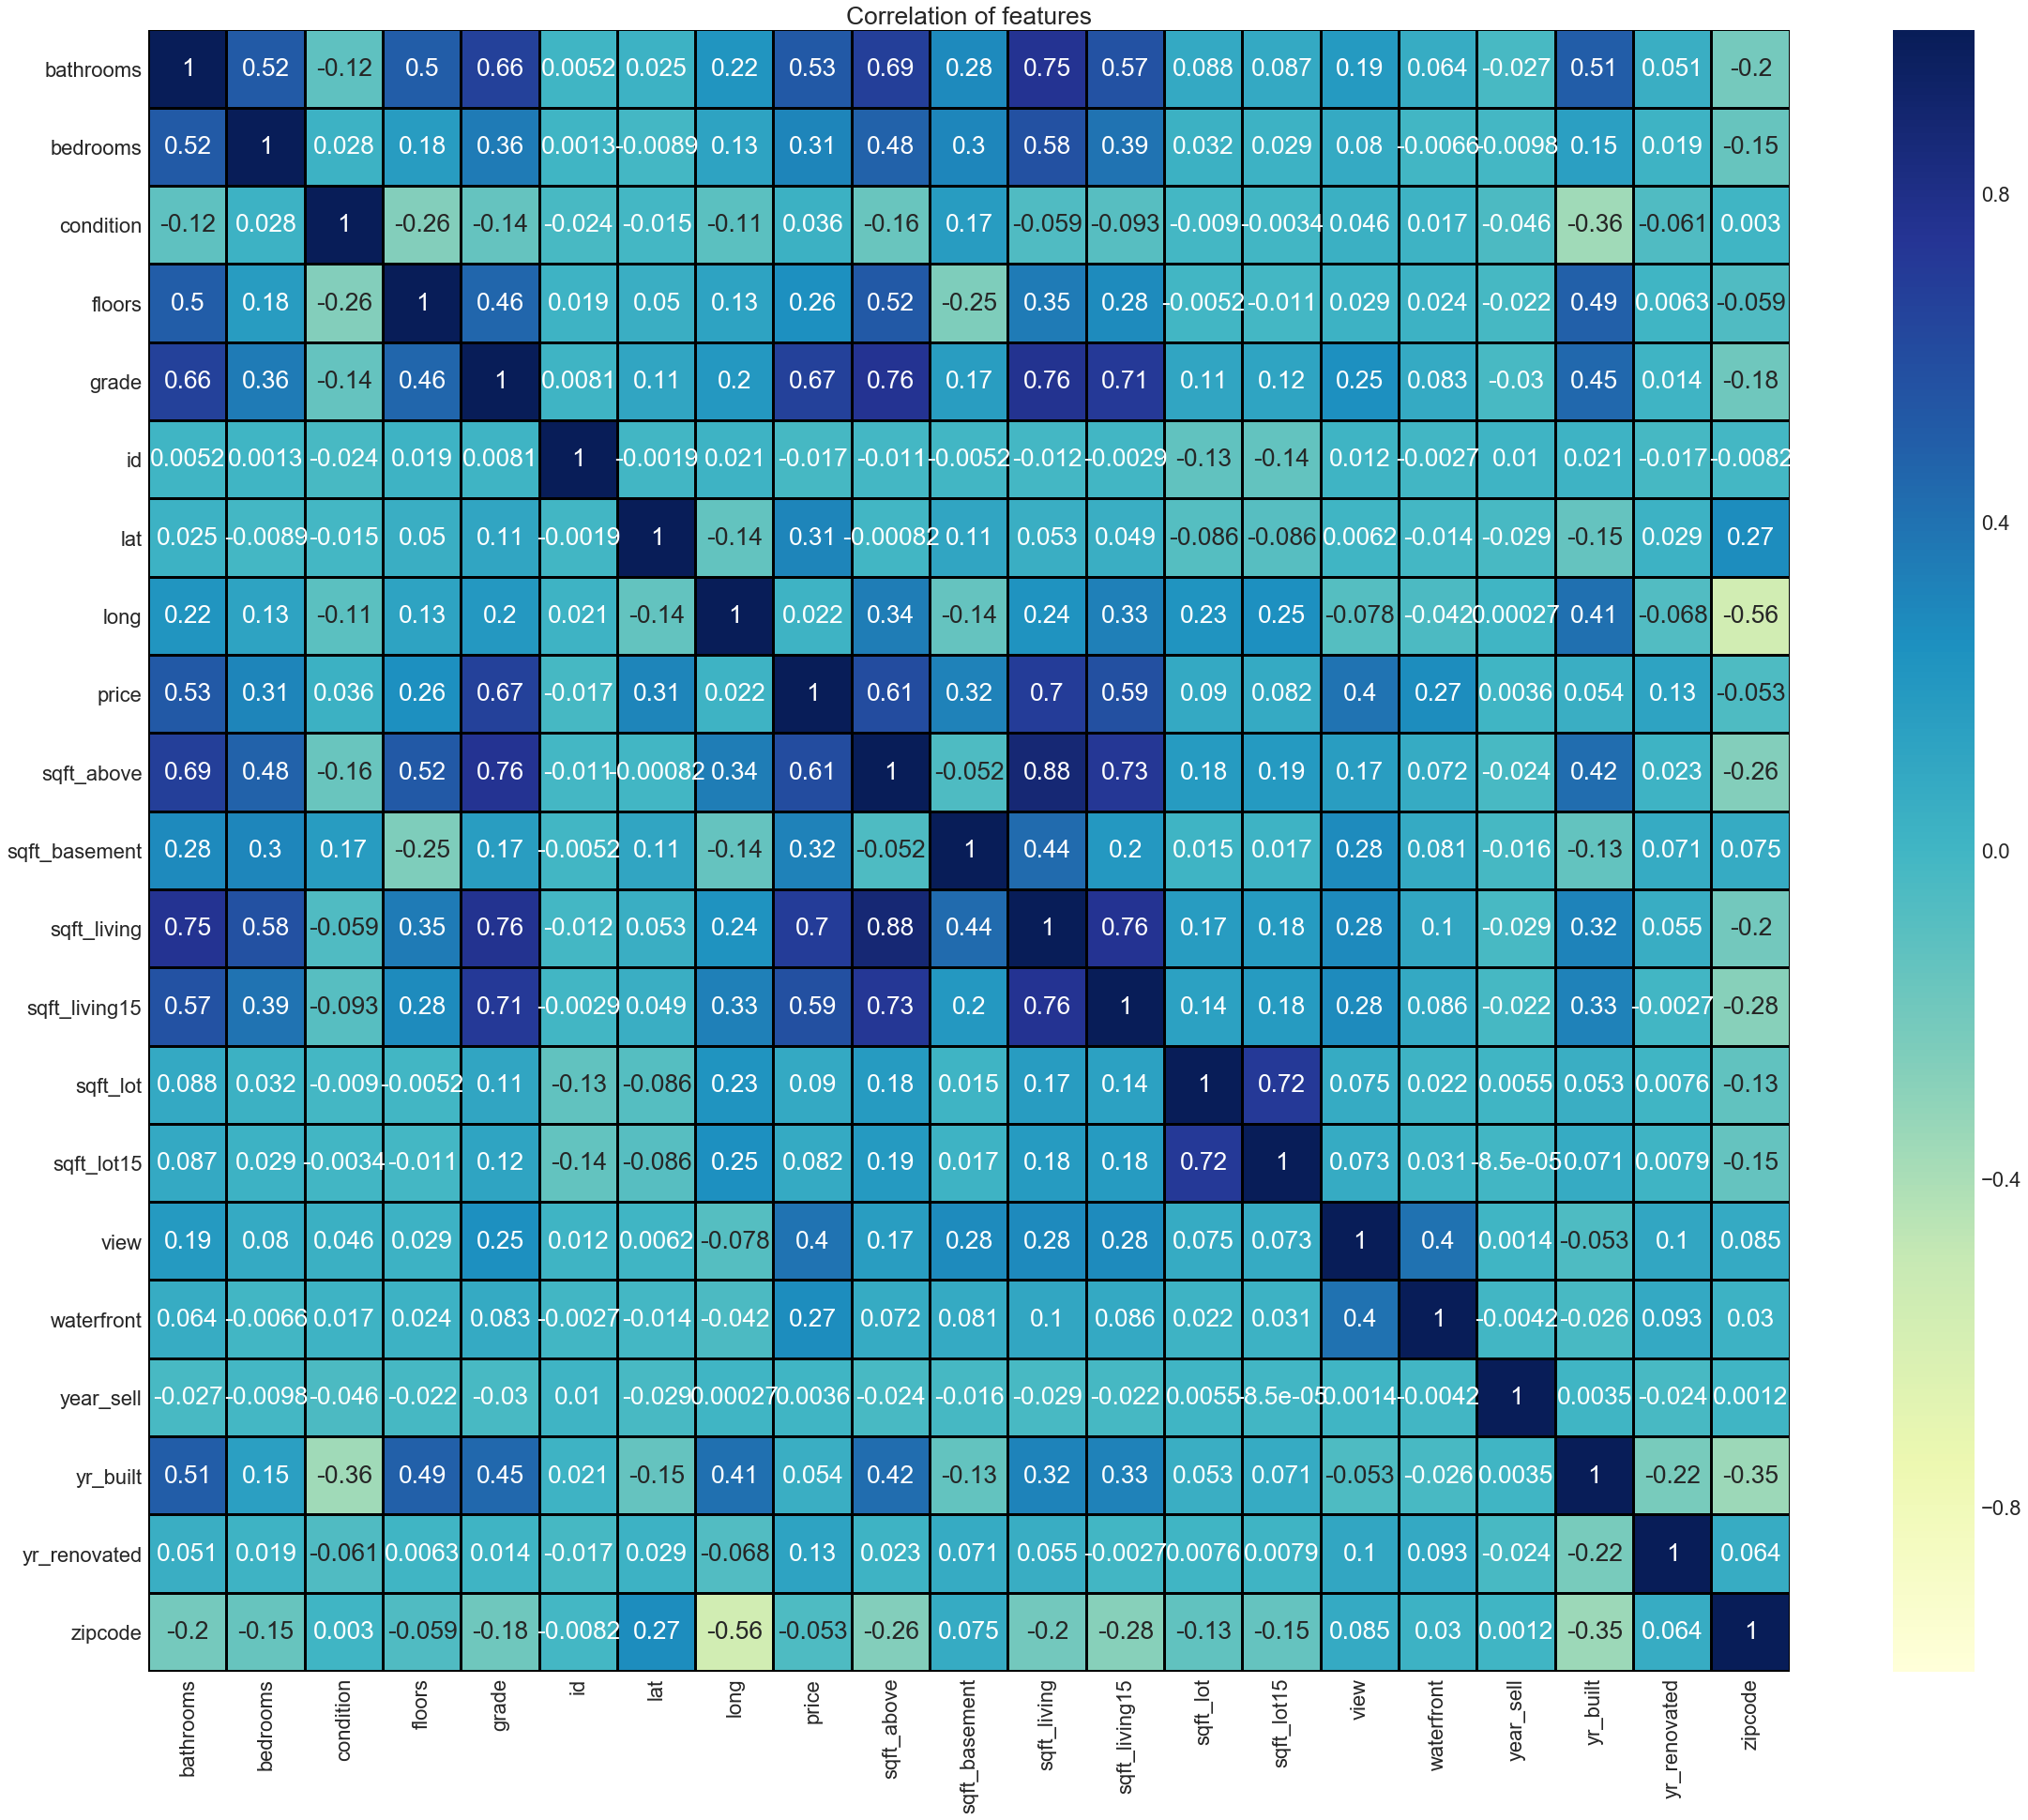

In [87]:
sns.set(font_scale=2.2)
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in kc_df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = kc_df.columns.difference(str_list) 
# Create Dataframe containing only numerical features
house_num = kc_df[num_list]
f, ax = plt.subplots(figsize=(35, 30))
plt.title('Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(house_num.astype(float).corr(),linewidths=2.0,vmax=1.0, square=True, cmap="YlGnBu", linecolor='k', annot=True)
plt.show()

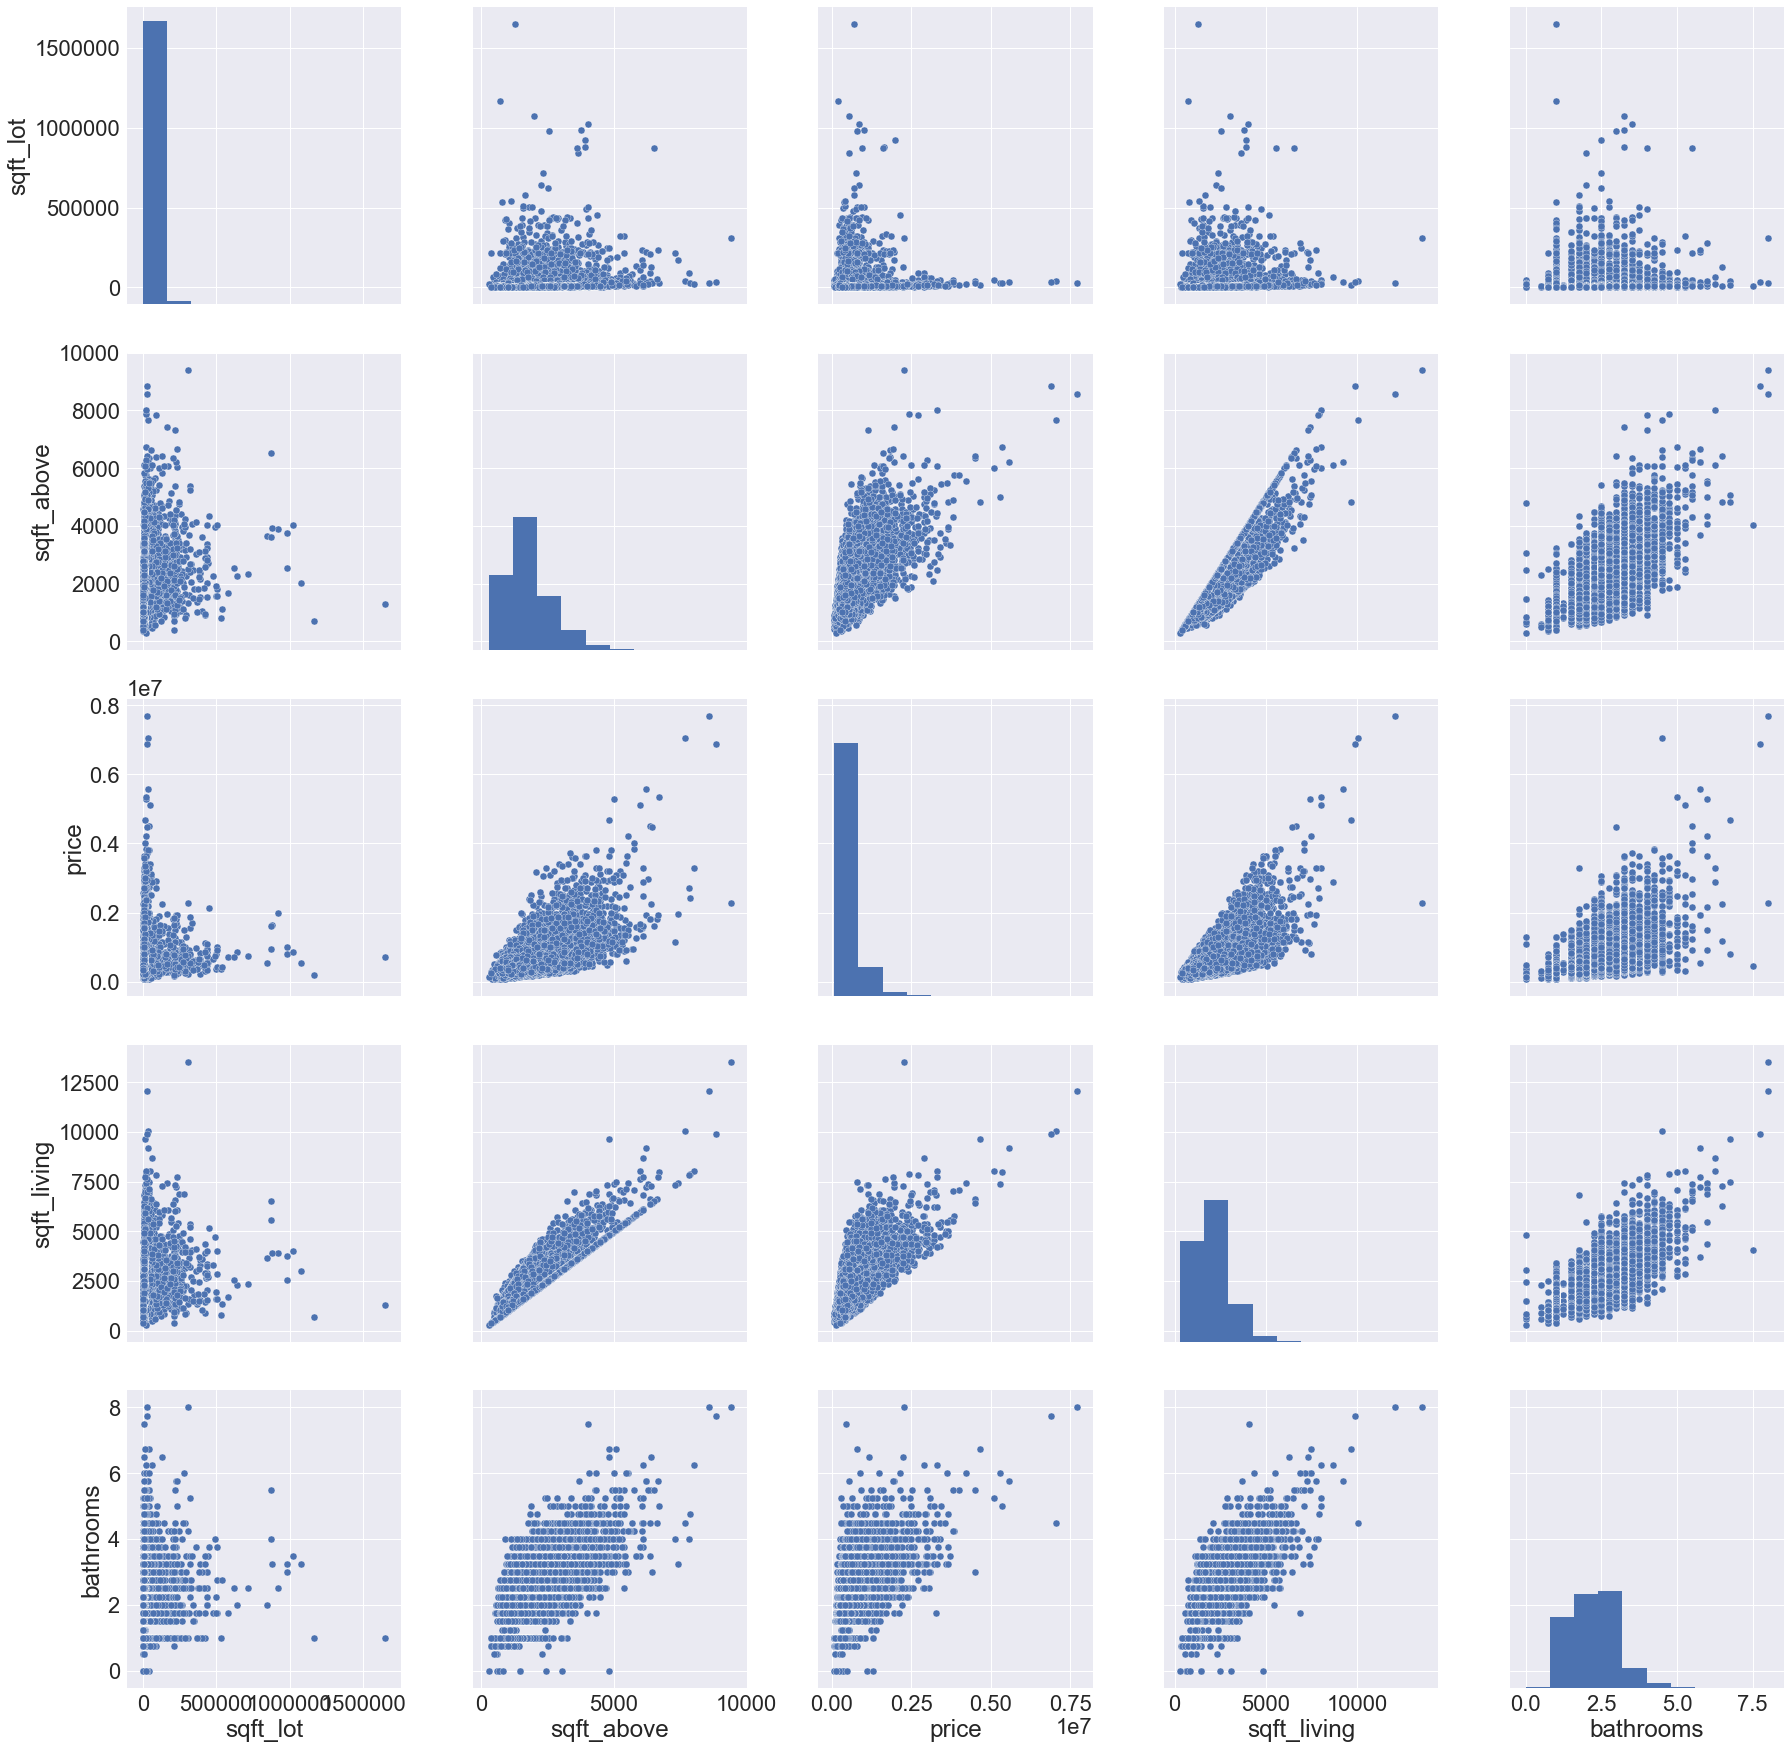

In [84]:
##Scatterplot

sns.set(font_scale=2.2)
g = sns.pairplot(kc_df[['sqft_lot','sqft_above','price','sqft_living','bathrooms']] ,size=5)
plt.show()